<a href="https://colab.research.google.com/github/amarildo86/datascience/blob/master/Ifood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

In [195]:
ifood = pd.read_csv('//content//ml_project1_data.csv')
ifood.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [196]:
ifood.shape

(2240, 29)

In [197]:
ifood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [198]:
ifood_clear = ifood.dropna()

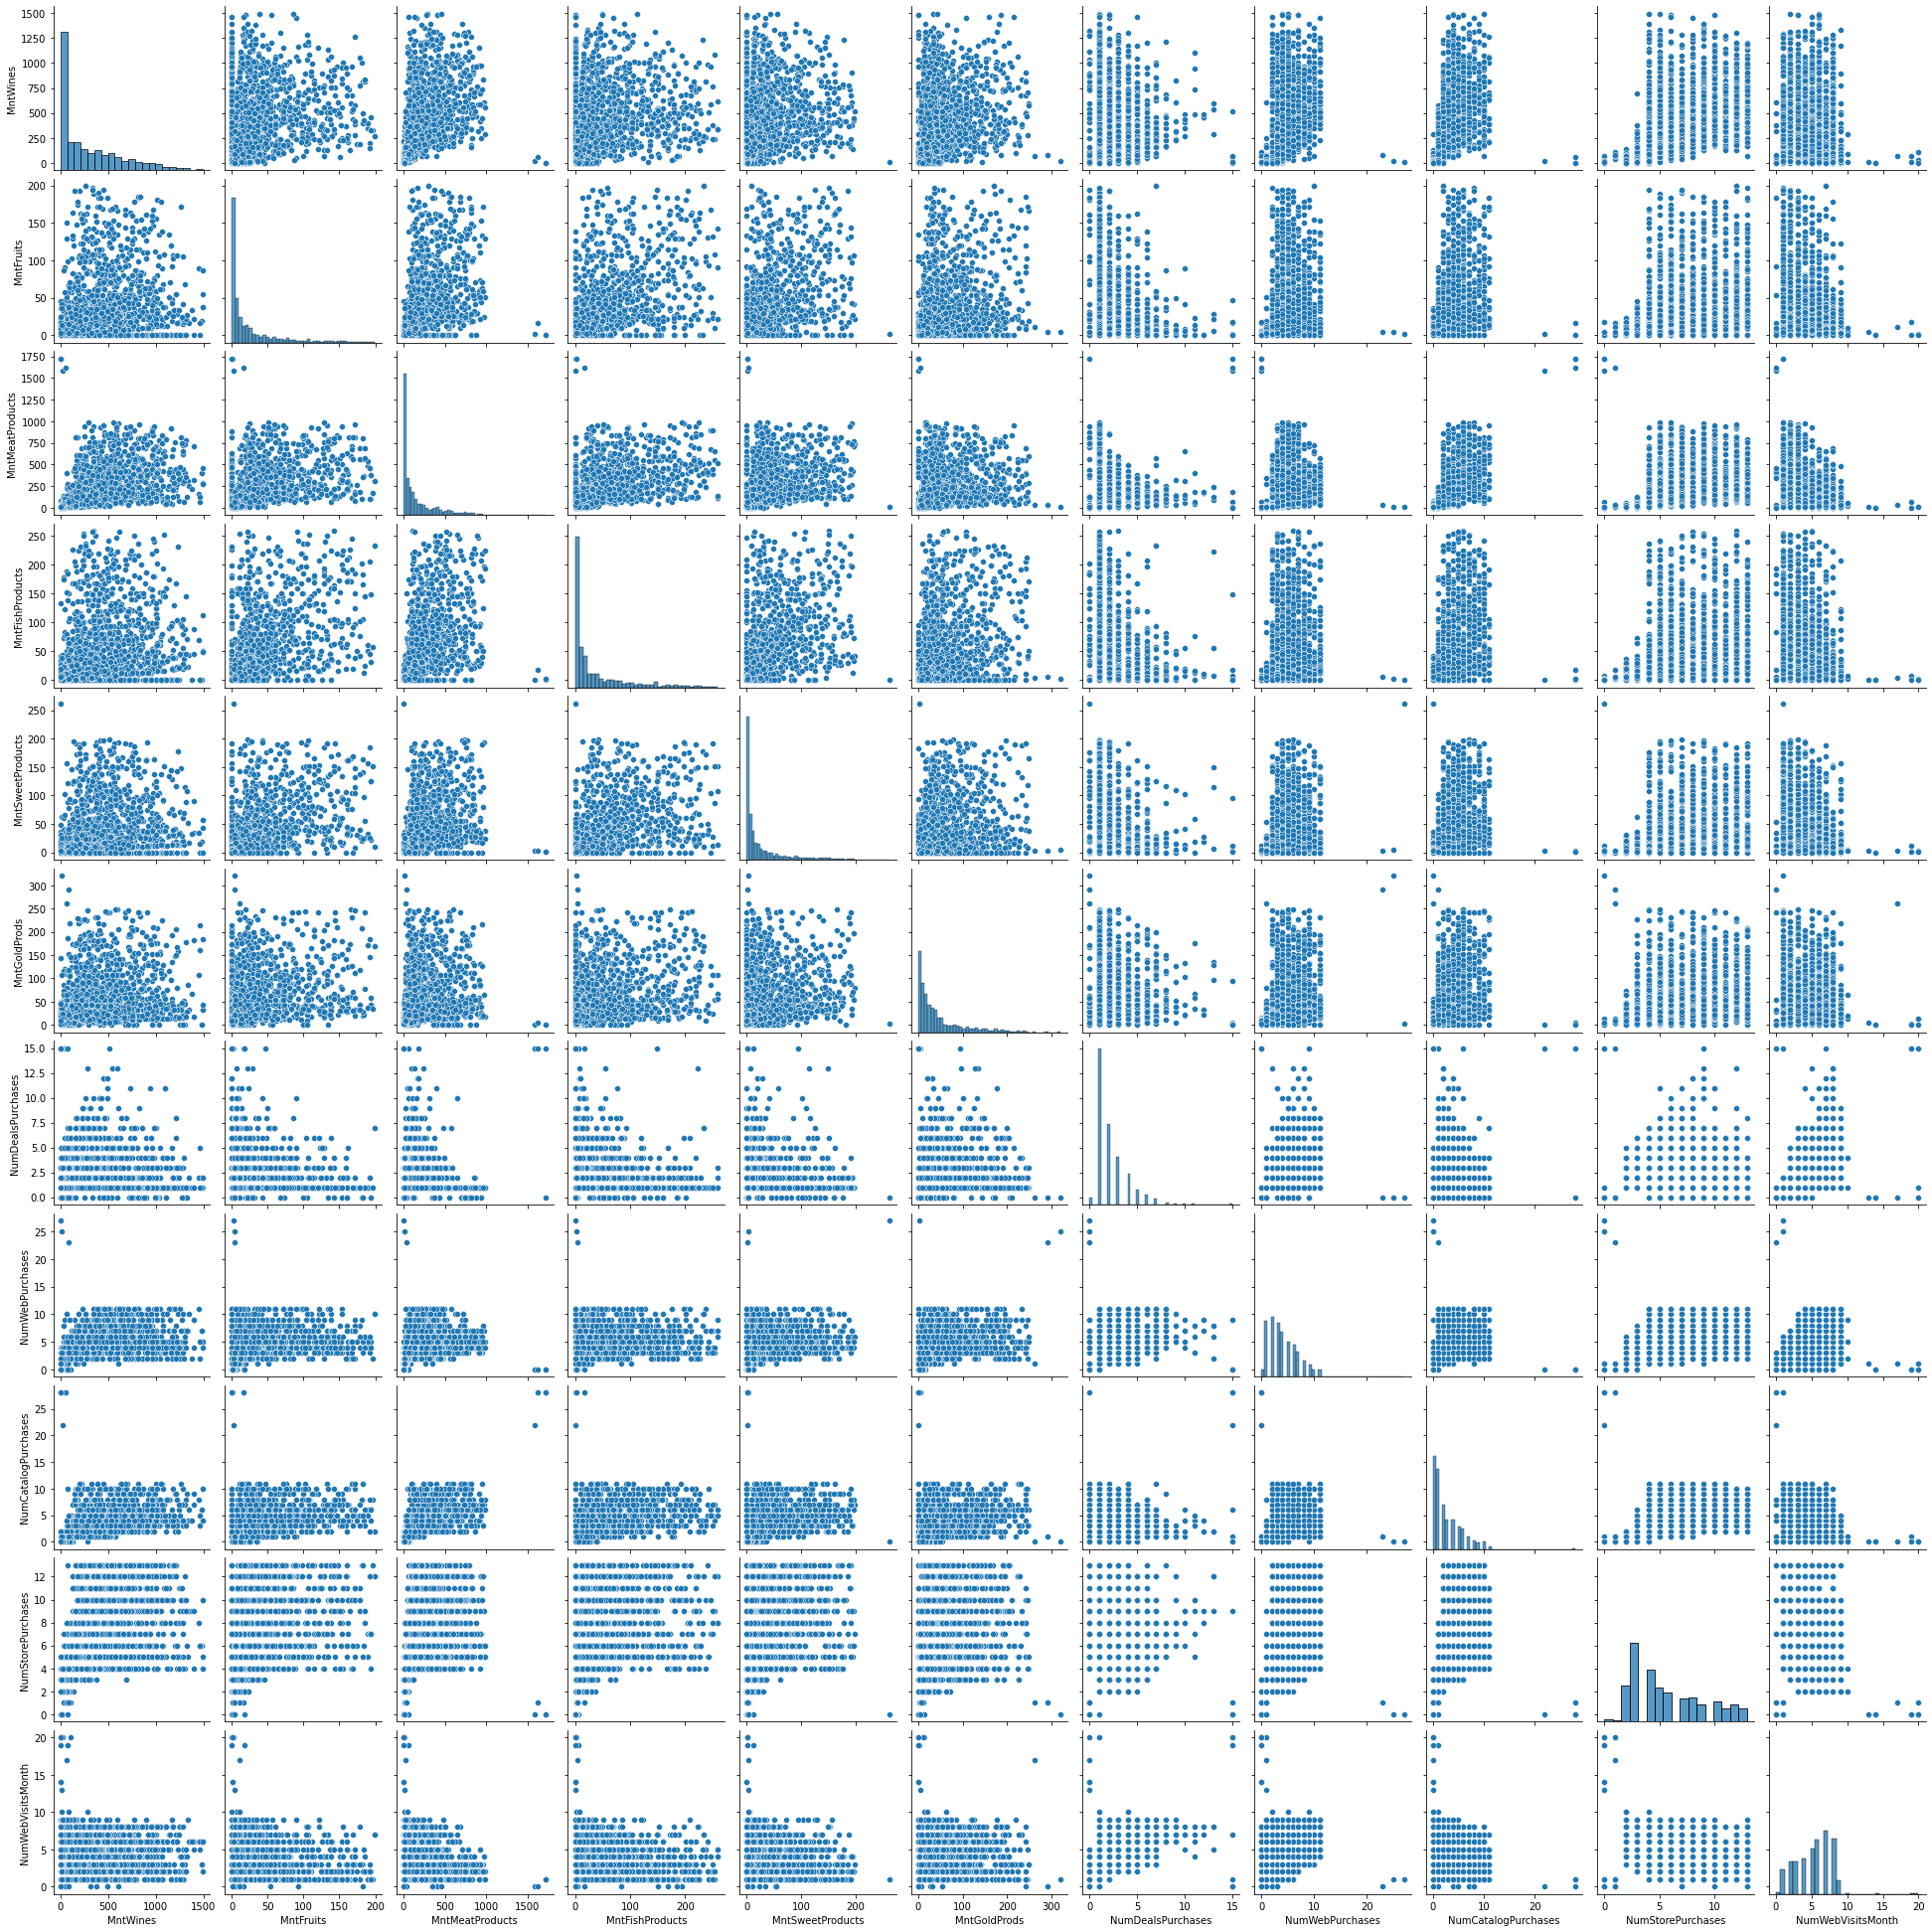

In [199]:
sns.pairplot(ifood_clear.iloc[:, 9:20])

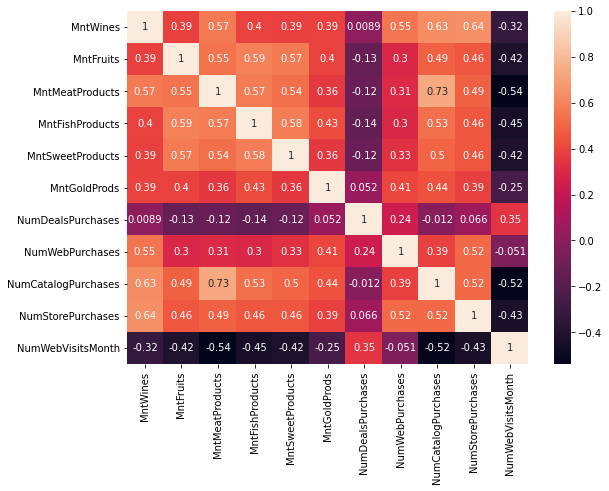

In [200]:
plt.figure(figsize=(9, 6.5))
sns.heatmap(ifood_clear.iloc[:, 9:20].corr(), annot=True)

In [201]:
best_products = ifood_clear.loc[:, ['Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
best_products['gasto_total'] = best_products.iloc[:, 3:].sum(axis=1)

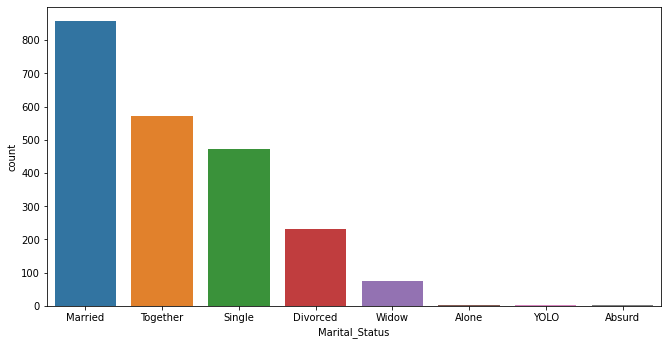

In [202]:
plt.figure(figsize=(11, 5.5))
sns.countplot(x='Marital_Status', data=best_products, order=best_products['Marital_Status'].value_counts().index)

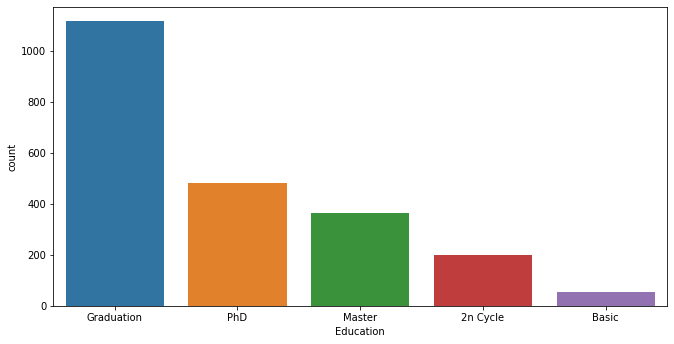

In [203]:
plt.figure(figsize=(11, 5.5))
sns.countplot(x='Education', data=best_products, order=best_products['Education'].value_counts().index)

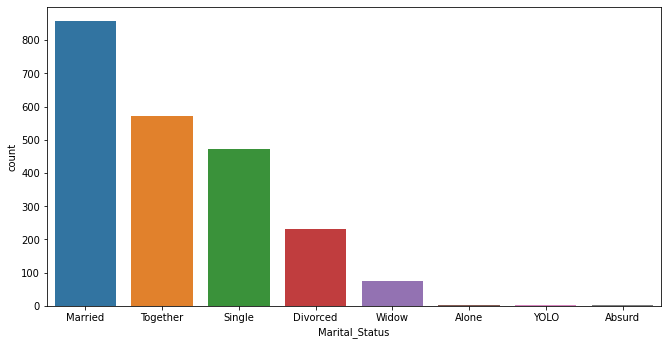

In [204]:
plt.figure(figsize=(11, 5.5))
sns.countplot(x='Marital_Status', data=best_products, order=best_products['Marital_Status'].value_counts().index)

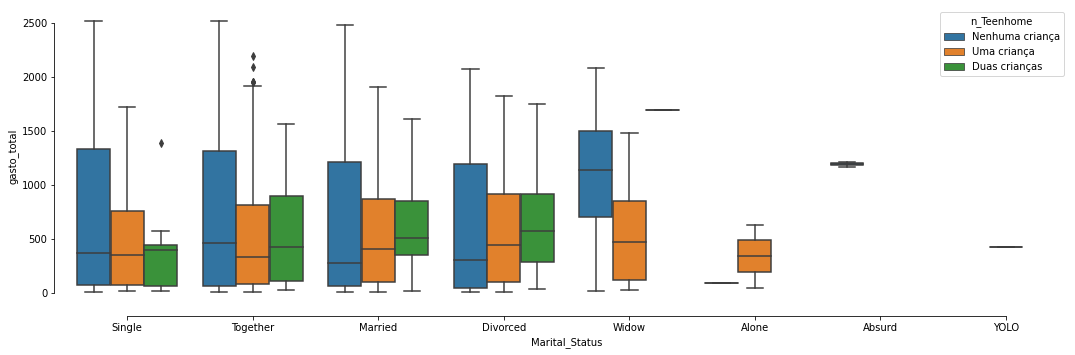

In [244]:
best_products['n_Teenhome'] = ifood_clear['Teenhome'].replace({0: 'Nenhuma criança', 1: 'Uma criança', 2: 'Duas crianças'})

plt.figure(figsize=(18, 5.5))
sns.boxplot(y='gasto_total', x='Marital_Status', hue='n_Teenhome', data=best_products)
sns.despine(offset=10, trim=True)

O gráfico de boxplot nos traz um insight bastante interessante. Observa-se que 50% dos viúvos têm um padrão de gastos maior que a média de todas as outras categorias. Se eles têm maior propensão ao gasto, poderíamos ofertar direcionar os esforços e aumentar o leque de oferta para eles.


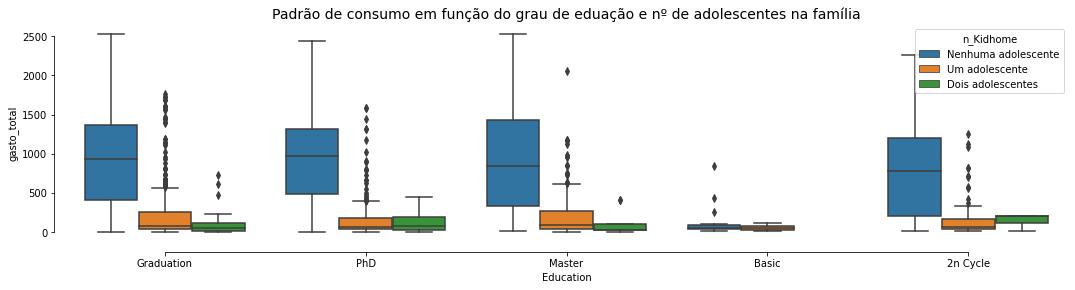

In [249]:
best_products['n_Kidhome'] = ifood_clear['Kidhome'].replace({0: 'Nenhuma adolescente', 1: 'Um adolescente', 2: 'Dois adolescentes'})

plt.figure(figsize=(18, 4))
plt.title("Padrão de consumo em função do grau de eduação e nº de adolescentes na família", fontsize=14)
sns.boxplot(y='gasto_total', x='Education', hue='n_Kidhome', data=best_products)
sns.despine(offset=10, trim=True)

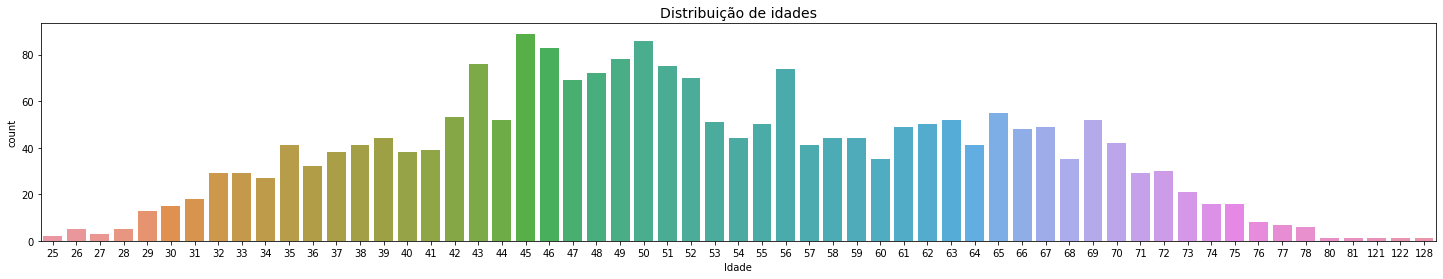

In [207]:
best_products['Idade'] = pd.to_datetime("now").year - best_products["Year_Birth"]

plt.figure(figsize=(25, 4))
plt.title("Distribuição de idades", fontsize=14)
sns.countplot(x='Idade', data=best_products)

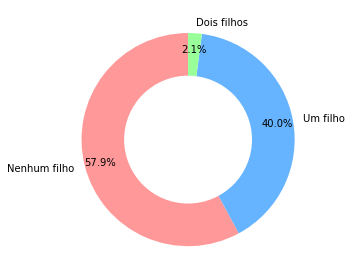

In [210]:
labels = ['Nenhuma criaça', 'Uma criança', 'Duas crianças']
sizes = [ifood_clear['Kidhome'].value_counts()]
colors = ['#ff9999','#66b3ff','#99ff99']
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

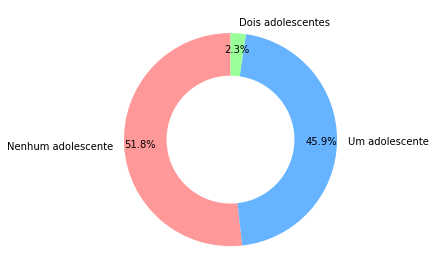

In [214]:
labels = ['Nenhum adolescente', 'Um adolescente', 'Dois adolescentes']
sizes = [ifood_clear['Teenhome'].value_counts()]
colors = ['#ff9999','#66b3ff','#99ff99']
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()